In [36]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import functions as main
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Transform cluttered data

### Merge de todos os dados Macro num só CSV

In [55]:
from pathlib import Path
import glob

path = r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\variables_data"
files = Path(path).glob('*.csv')  # .rglob to get subdirectories

dfs = []
for file in files:
    # Leitura do CSV
    data = pd.read_csv(file)
    
    # Ajuste do nome da coluna de datas para um nome consistente
    if 'DATE' in data.columns:
        data.rename(columns={'DATE': 'Date'}, inplace=True)
    
    if 'date' in data.columns:
        data.rename(columns={'date': 'Date'}, inplace=True)

    data["Date"] = pd.to_datetime(data.Date)

    # Definir a coluna de datas como índice
    data.set_index('Date', inplace=True)
    
    # Adicionar o DataFrame à lista
    dfs.append(data)

# Juntar todos os DataFrames usando o método "outer"
df = pd.concat(dfs, axis=1, join='outer')

In [56]:
df_daily = df.resample("D").last()

In [57]:
df_daily_mod = df_daily.loc["2011-1-1":"2024-7-31"]
df_daily_mod

BalanceSheet_global  BalanceSheet_usa   BTC_USD  \
Date                                                          
2011-01-01                  NaN               NaN     0.300   
2011-01-02                  NaN               NaN     0.300   
2011-01-03                  NaN               NaN     0.295   
2011-01-04                  NaN               NaN     0.299   
2011-01-05            11809.998       2436064.000     0.299   
...                         ...               ...       ...   
2024-07-27                  NaN               NaN 67904.550   
2024-07-28                  NaN               NaN 68252.750   
2024-07-29                  NaN               NaN 66782.780   
2024-07-30                  NaN               NaN 66180.040   
2024-07-31                  NaN               NaN 64617.830   

            Mining_Difficulty  USD_OnChain_Volume   GDP_usa      HashRate  \
Date                                                                        
2011-01-01          14484.162            3756.462 15351.448         0.128   
2011-01-02          14484.162            7008.423       NaN         0.130   
2011-01-03          16307.421            7795.668       NaN         0.133   
2011-01-04          16307.421            3301.215       NaN         0.115   
2011-01-05          16307.421            5556.873       NaN         0.122   
...                       ...                 ...       ...           ...   
2024-07-27 82047728459932.734      4232975746.964       NaN 628106664.453   
2024-07-28 82047728459932.750      2767696675.789       NaN 603634976.228   
2024-07-29 82047728459932.625      9902659739.017       NaN 725993417.355   
2024-07-30 82047728459932.750     15119384835.083       NaN 611792205.636   
2024-07-31 87487947532070.141      9602772099.094       NaN 613215974.024   

            M2_Liquidity  EURUSD=X  DX-Y.NYB  ...    TLT  ^TNX   ^VIX  \
Date                                          ...                       
2011-01-01           NaN       NaN       NaN  ...    NaN   NaN    NaN   
2011-01-02           NaN       NaN       NaN  ...    NaN   NaN    NaN   
2011-01-03      8888.500     1.336    79.130  ... 65.316 3.342 17.610   
2011-01-04           NaN     1.336    79.440  ... 65.393 3.346 17.380   
2011-01-05           NaN     1.332    80.260  ... 63.952 3.483 17.020   
...                  ...       ...       ...  ...    ...   ...    ...   
2024-07-27           NaN       NaN       NaN  ...    NaN   NaN    NaN   
2024-07-28           NaN       NaN       NaN  ...    NaN   NaN    NaN   
2024-07-29           NaN     1.085   104.560  ... 93.179 4.178 16.600   
2024-07-30           NaN     1.082   104.550  ... 93.538 4.143 17.690   
2024-07-31           NaN     1.082   104.100  ... 94.495 4.109 16.360   

            Miners_Revenue_USD  Nr_Tx_Block  Nr_Transactions  Nr_Addresses  \
Date                                                                         
2011-01-01            2775.027        3.641          659.000           NaN   
2011-01-02            2775.027        3.251          569.000       740.000   
2011-01-03            2340.218        7.231         1128.000      1023.000   
2011-01-04            2115.009        6.943          979.000       907.000   
2011-01-05            2370.028        8.506         1310.000      1111.000   
...                        ...          ...              ...           ...   
2024-07-27        33621812.773     2894.351       445730.000    508959.000   
2024-07-28        32416704.844     5092.588       753703.000    431944.000   
2024-07-29        40280474.147     4641.174       826129.000    543529.000   
2024-07-30        31830629.065     4553.973       683096.000    500916.000   
2024-07-31        29878304.716     3991.624       562819.000    542141.000   

            BTC_PageViews  Crypto_PageViews   BTC_Supply  
Date                                                      
2011-01-01            NaN               NaN  5029550.000  
2011-01-02            NaN               NaN  503

In [58]:
df_weekly_mod = df_daily_mod.resample('W-FRI').last() # close semanal à sexta feira

In [59]:
df_weekly_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709 entries, 2011-01-07 to 2024-08-02
Freq: W-FRI
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BalanceSheet_global  705 non-null    float64
 1   BalanceSheet_usa     706 non-null    float64
 2   BTC_USD              709 non-null    float64
 3   Mining_Difficulty    709 non-null    float64
 4   USD_OnChain_Volume   707 non-null    float64
 5   GDP_usa              53 non-null     float64
 6   HashRate             709 non-null    float64
 7   M2_Liquidity         705 non-null    float64
 8   EURUSD=X             709 non-null    float64
 9   DX-Y.NYB             709 non-null    float64
 10  SPY                  709 non-null    float64
 11  QQQ                  709 non-null    float64
 12  IWDA.AS              709 non-null    float64
 13  GLD                  709 non-null    float64
 14  TLT                  709 non-null    float64
 15  ^TNX     

In [60]:
df_weekly_mod.isna().sum()

BalanceSheet_global      4
BalanceSheet_usa         3
BTC_USD                  0
Mining_Difficulty        0
USD_OnChain_Volume       2
GDP_usa                656
HashRate                 0
M2_Liquidity             4
EURUSD=X                 0
DX-Y.NYB                 0
SPY                      0
QQQ                      0
IWDA.AS                  0
GLD                      0
TLT                      0
^TNX                     0
^VIX                     0
Miners_Revenue_USD       0
Nr_Tx_Block              0
Nr_Transactions          0
Nr_Addresses             0
BTC_PageViews          234
Crypto_PageViews       234
BTC_Supply               0
dtype: int64

In [61]:
df_weekly_mod.interpolate(method='linear', inplace=True)
df_weekly_mod = df_weekly_mod.loc[df_weekly_mod.index[1]:]

In [62]:
df_weekly_mod.isna().sum()

BalanceSheet_global      0
BalanceSheet_usa         0
BTC_USD                  0
Mining_Difficulty        0
USD_OnChain_Volume       0
GDP_usa                  0
HashRate                 0
M2_Liquidity             0
EURUSD=X                 0
DX-Y.NYB                 0
SPY                      0
QQQ                      0
IWDA.AS                  0
GLD                      0
TLT                      0
^TNX                     0
^VIX                     0
Miners_Revenue_USD       0
Nr_Tx_Block              0
Nr_Transactions          0
Nr_Addresses             0
BTC_PageViews          233
Crypto_PageViews       233
BTC_Supply               0
dtype: int64

In [63]:
df_weekly_mod.to_csv(f"df_weekly.csv", date_format='%Y-%m-%d')

# Descriptive analysis

In [64]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)

In [65]:
pd.set_option('float_format', '{:.3f}'.format)
opencsv.describe().T

count               mean                std         min  \
BalanceSheet_global 708.000          17356.309           3661.233   11806.220   
BalanceSheet_usa    708.000        5225912.531        2030285.106 2425164.000   
BTC_USD             708.000          12651.790          18065.323       0.400   
Mining_Difficulty   708.000 13471654787449.916 21091514676422.969   16307.421   
USD_OnChain_Volume  708.000     1856625192.157     2679674679.983    8826.567   
GDP_usa             708.000          20724.253           3824.422   15368.622   
HashRate            708.000       97556434.132      153997155.234       0.141   
M2_Liquidity        708.000          14844.036           4222.849    8789.400   
EURUSD=X            708.000              1.183              0.111       0.975   
DX-Y.NYB            708.000             92.698              9.119      72.930   
SPY                 708.000            252.909            121.067      88.561   
QQQ                 708.000            180.507            118.013      44.400   
IWDA.AS             708.000             47.320             19.995      17.825   
GLD                 708.000            145.839             27.690     101.250   
TLT                 708.000            103.155             19.486      62.318   
^TNX                708.000              2.391              0.905       0.536   
^VIX                708.000             17.846              6.896       9.140   
Miners_Revenue_USD  708.000       13720080.813       16354115.596    3420.023   
Nr_Tx_Block         708.000           1474.311            993.973       4.918   
Nr_Transactions     708.000         216909.600         144647.483     954.000   
Nr_Addresses        708.000         422472.702         270736.529    1096.000   
BTC_PageViews       475.000          14033.716          21983.818    3687.000   
Crypto_PageViews    475.000             60.032             51.017       8.000   
BTC_Supply          708.000       15395017.823        3907051.636 5136250.000   

                                25%               50%                75%  \
BalanceSheet_global       14594.438         16567.991          20853.996   
BalanceSheet_usa        3936465.250       4463444.500        7334178.250   
BTC_USD                     255.170          3772.620          19324.755   
Mining_Difficulty   11431343972.299 1271897062328.000 19302229490721.500   
USD_OnChain_Volume     56205620.433     707708482.619     2623470974.950   
GDP_usa                   17710.820         20048.830          23145.940   
HashRate                  86050.856       8738622.881      136984025.089   
M2_Liquidity              11342.200         13745.050          19736.325   
EURUSD=X                      1.098             1.141              1.275   
DX-Y.NYB                     82.740            94.955             98.658   
SPY                         159.814           227.158            364.115   
QQQ                          84.714           141.974            284.107   
IWDA.AS                      30.138            43.935             64.068   
GLD                         121.258           141.880            167.805   
TLT                          90.447           100.287            110.024   
^TNX                          1.766             2.274              2.872   
^VIX                         13.215            15.970             20.708   
Miners_Revenue_USD      1103699.998       7095718.976       20756398.639   
Nr_Tx_Block                 431.119          1688.596           2149.679   
Nr_Transactions           68556.500        249100.000         310564.750   
Nr_Addresses             146374.000        503395.000         662633.500   
BTC_PageViews              6450.000          8619.000          13681.500   
Crypto_PageViews             29.000            43.000             78.000   
BTC_Supply             12856968.750      16643287.500       18653826.562   

                                   max  
BalanceSheet_global          23522.830  
BalanceSheet_

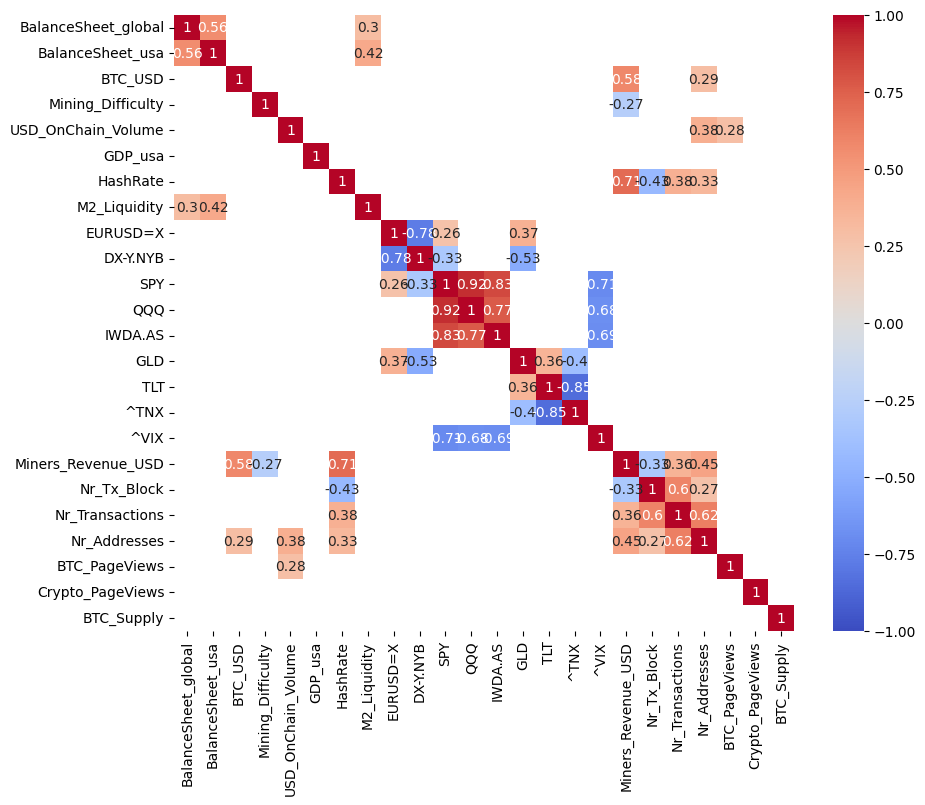

In [66]:
main.correlation_map(df=opencsv, threshold=0.25)

# OLS data Prep

In [67]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)

In [68]:
opencsv

BalanceSheet_global  BalanceSheet_usa   BTC_USD  \
Date                                                          
2011-01-14            11873.106       2468131.000     0.400   
2011-01-21            11853.558       2425164.000     0.420   
2011-01-28            11828.847       2443527.000     0.446   
2011-02-04            11806.220       2469419.000     0.811   
2011-02-11            11882.804       2500481.000     1.070   
...                         ...               ...       ...   
2024-07-05            23522.830       7221520.000 56646.240   
2024-07-12            23522.830       7224079.000 57913.680   
2024-07-19            23522.830       7224079.000 66708.490   
2024-07-26            23522.830       7224079.000 67925.170   
2024-08-02            23522.830       7224079.000 64617.830   

            Mining_Difficulty  USD_OnChain_Volume   GDP_usa      HashRate  \
Date                                                                        
2011-01-14          16307.421           21755.483 15368.622         0.141   
2011-01-21          18437.644            9615.688 15385.797         0.163   
2011-01-28          22012.381            8826.567 15402.971         0.178   
2011-02-04          22012.381           23196.599 15420.145         0.208   
2011-02-11          25997.880           54736.885 15437.319         0.247   
...                       ...                 ...       ...           ...   
2024-07-05 80082477459597.125     17072634339.063 28269.174 481691507.202   
2024-07-12 79495195323031.234      7362339048.253 28269.174 592759139.065   
2024-07-19 82047728459932.766      8528315185.287 28269.174 599556361.524   
2024-07-26 82047728459932.703      7332170770.133 28269.174 652578352.679   
2024-08-02 87487947532070.141      9602772099.094 28269.174 613215974.024   

            M2_Liquidity  EURUSD=X  DX-Y.NYB  ...    TLT  ^TNX   ^VIX  \
Date                                          ...                       
2011-01-14      8887.300     1.335    79.160  ... 64.218 3.333 15.460   
2011-01-21      8910.100     1.347    78.210  ... 63.994 3.416 18.470   
2011-01-28      8790.000     1.372    78.130  ... 64.274 3.329 20.040   
2011-02-04      8789.400     1.362    78.040  ... 62.318 3.652 15.930   
2011-02-11      8868.300     1.360    78.460  ... 62.774 3.646 15.690   
...                  ...       ...       ...  ...    ...   ...    ...   
2024-07-05     20947.500     1.079   104.880  ... 92.252 4.272 12.480   
2024-07-12     20947.500     1.087   104.090  ... 93.628 4.189 12.460   
2024-07-19     20947.500     1.090   104.400  ... 92.611 4.239 16.520   
2024-07-26     20947.500     1.085   104.320  ... 92.681 4.200 16.390   
2024-08-02     20947.500     1.082   104.100  ... 94.495 4.109 16.360   

            Miners_Revenue_USD  Nr_Tx_Block  Nr_Transactions  Nr_Addresses  \
Date                                                                         
2011-01-14            3843.027        6.972         1262.000      1096.000   
2011-01-21            3420.023        6.701         1166.000      1520.000   
2011-01-28            3483.026        6.842         1081.000      1403.000   
2011-02-04            7722.096        4.918          954.000      1169.000   
2011-02-11           10044.539       12.661         2355.000      3680.000   
...                        ...          ...              ...           ...   
2024-07-05        22301675.551     4054.025       490537.000    510689.000   
2024-07-12        28054420.059     4389.033       658355.000    486027.000   
2024-07-19        31188257.507     3455.374       507940.000    510414.000   
2024-07-26        34769098.692     2869.169       459067.000    529294.000   
2024-08-02        29878304.716     3991.624       562819.000    542141.000   

            BTC_PageViews  Crypto_PageViews   BTC_Supply  
Date                                                      
2011-01-14            NaN               NaN  5136250.000  
2011-01-21            NaN               NaN  519

### Linear trend check

In [16]:
import matplotlib.pyplot as plt

def check_linearity(df, dependent_variable):
    # Number of subplots
    n = len(df.columns) - 1

    axs = plt.subplots(n, figsize=(10, 6 * n))  # Adjust height for better readability

    # Initialize subplot index
    plot_index = 0

    # Iterate through each column in the DataFrame
    for column in df.columns:
        if column != dependent_variable:
            y = df[column]
            x = df[dependent_variable]

            # Scatter plot
            axs[plot_index].scatter(x, y)
            
            # Calculate the trendline
            z = np.polyfit(x, y, 1)  # Fit a linear trendline (degree=1)
            p = np.poly1d(z)
            
            # Plot the trendline
            axs[plot_index].plot(x, p(x), "r--")
            
            # Set titles and labels
            axs[plot_index].set_title(f"{column} vs {dependent_variable}")
            axs[plot_index].set_xlabel(dependent_variable)
            axs[plot_index].set_ylabel(column)
            
            plot_index += 1  # Move to the next subplot index

    return plt.show()

In [17]:
import importlib
importlib.reload(main)

<module 'functions' from 'd:\\OneDrive - Instituto Politecnico de Castelo Branco\\002_Learning\\001_Pos_Graduacao\\Ciclo 5 - Projeto Final\\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\\functions.py'>

In [18]:
import plotly.express as px

def check_linearity(df, dependent_variable):
    for column in df.columns:
        if column != dependent_variable:
            df_pct_ret = df.pct_change().ffill()

            # Fazer scatter plot
            fig = px.scatter(df_pct_ret, x=df[column], y=df[dependent_variable], width=600, height=400, 
                             trendline="ols", trendline_color_override="black", title='OLS trend line')

            fig.update_layout(xaxis=dict(title=column), yaxis = dict(title=dependent_variable), template='seaborn').show()

In [19]:
dependent_variable = "BTC_USD"

check_linearity(opencsv, dependent_variable)

## Normality Tests

Text(0.5, 1.0, 'Distribution of Bitcoin returns in $log$ scale')

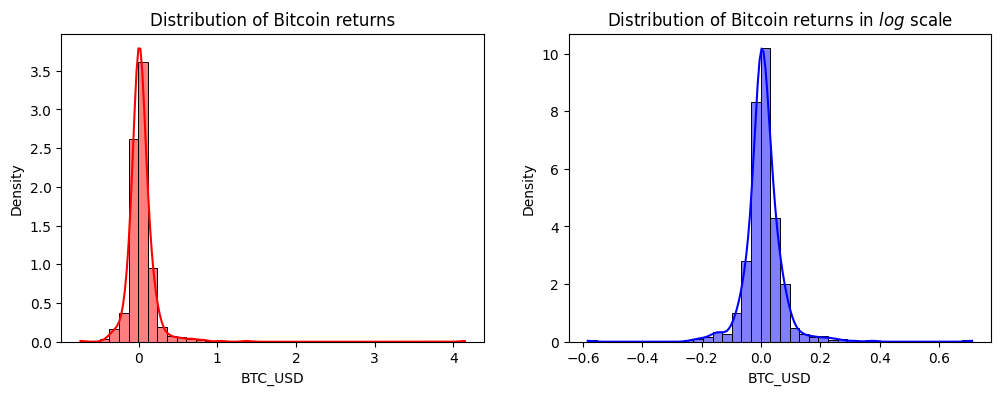

In [25]:
import seaborn as sns

btc_returns = opencsv["BTC_USD"].pct_change().dropna()
btc_log_returns = np.log10(opencsv["BTC_USD"]).diff().dropna()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(btc_returns,bins=40,color='r',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns')

ax=f.add_subplot(122)
sns.histplot(btc_log_returns,bins=40,color='b',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns in $log$ scale')

### Box -Cox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.  
$$\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i\neg=0 \\
 log(y_i) & \lambda = 0 \end{cases}}$$
 The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval

In [26]:
from scipy.stats import boxcox
BTC_USD_BoxCox,lam, ci= boxcox(opencsv["BTC_USD"],alpha=0.05)

ci,lam

((0.1107887470639965, 0.16061495296256906), 0.13540796377476028)

Text(0.5, 1.0, 'Distribution of Bitcoin Box Cox returns')

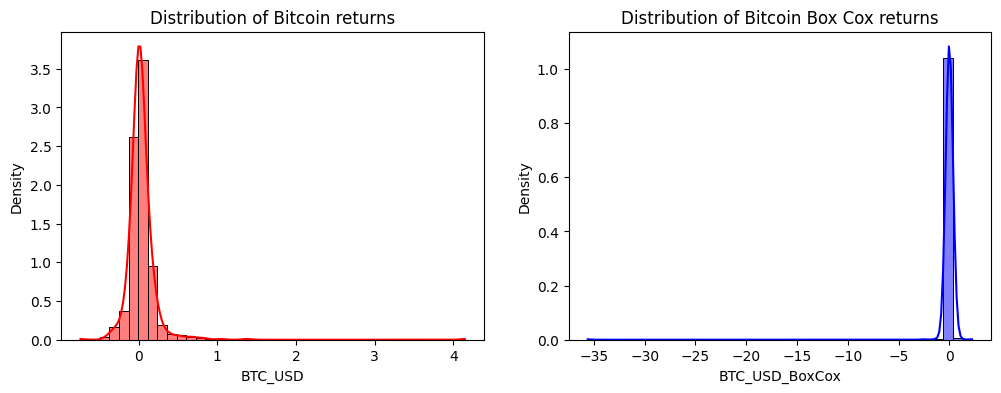

In [35]:
import seaborn as sns

# Convert numpy array to a DataFrame
BTC_USD_BoxCox_df = pd.DataFrame(BTC_USD_BoxCox, index=opencsv.index, columns=["BTC_USD_BoxCox"])

btc_BoxCox_returns = BTC_USD_BoxCox_df["BTC_USD_BoxCox"].pct_change().dropna()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(btc_returns,bins=40,color='r',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns')

ax=f.add_subplot(122)
sns.histplot(btc_BoxCox_returns,bins=40,color='b',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin Box Cox returns')

### Log Df

In [84]:
# transformacao logaritcmica de todas as colunas

log_df = opencsv.copy()
log_df = log_df.drop(columns=["BTC_PageViews", "Crypto_PageViews"])
log_df = np.log10(log_df) 
log_df

BTC_USD  Mining_Difficulty  USD_OnChain_Volume  M2_Liquidity  \
Date                                                                       
2010-09-17   -1.221              2.853               3.621         3.939   
2010-09-24   -1.206              2.963               3.025         3.937   
2010-10-01   -1.208              3.120               3.325         3.935   
2010-10-08   -1.061              3.120               3.914         3.939   
2010-10-15   -0.979              3.139               3.638         3.940   
...             ...                ...                 ...           ...   
2024-07-12    4.763             13.900               9.867         4.321   
2024-07-19    4.824             13.914               9.931         4.321   
2024-07-26    4.832             13.914               9.865         4.321   
2024-08-02    4.788             13.957               9.992         4.321   
2024-08-09    4.774             13.957               9.815         4.321   

            EUR_USD  JPY_USD  JPY_EUR   SPY   QQQ  EXSA  JPXN  IWDA   GLD  \
Date                                                                        
2010-09-17    0.116   -1.934   -2.051 1.940 1.627 1.274 1.517 1.296 2.095   
2010-09-24    0.124   -1.927   -2.052 1.949 1.642 1.276 1.524 1.291 2.103   
2010-10-01    0.134   -1.922   -2.057 1.948 1.636 1.268 1.524 1.282 2.110   
2010-10-08    0.144   -1.916   -2.060 1.956 1.643 1.274 1.538 1.287 2.119   
2010-10-15    0.148   -1.911   -2.059 1.960 1.657 1.279 1.536 1.289 2.126   
...             ...      ...      ...   ...   ...   ...   ...   ...   ...   
2024-07-12    0.036   -2.199   -2.236 2.748 2.694 1.717 1.879 1.984 2.349   
2024-07-19    0.037   -2.196   -2.234 2.740 2.677 1.705 1.872 1.975 2.346   
2024-07-26    0.035   -2.187   -2.222 2.736 2.666 1.708 1.865 1.972 2.344   
2024-08-02    0.034   -2.184   -2.218 2.741 2.673 1.712 1.880 1.980 2.355   
2024-08-09    0.034   -2.184   -2.218 2.741 2.673 1.712 1.880 1.980 2.355   

             SLV   TLT   BND  Nr_Transactions  Nr_Addresses  BTC_Supply  
Date                                                                     
2010-09-17 1.307 1.846 1.745            2.558         2.574       6.604  
2010-09-24 1.322 1.854 1.746            2.700         2.757       6.612  
2010-10-01 1.335 1.860 1.748            2.766         2.827       6.619  
2010-10-08 1.357 1.858 1.750            2.560         2.657       6.624  
2010-10-15 1.376 1.841 1.748            2.516         2.605       6.630  
...          ...   ...   ...              ...           ...         ...  
2024-07-12 1.449 1.971 1.862            5.818         5.687       7.295  
2024-07-19 1.426 1.967 1.860            5.706         5.708       7.295  
2024-07-26 1.406 1.967 1.862            5.662         5.724       7.295  
2024-08-02 1.421 1.975 1.865            5.613         5.725       7.295  
2024-08-09 1.421 1.975 1.865            5.688         5.734       7.295  

[726 rows x 19 columns]

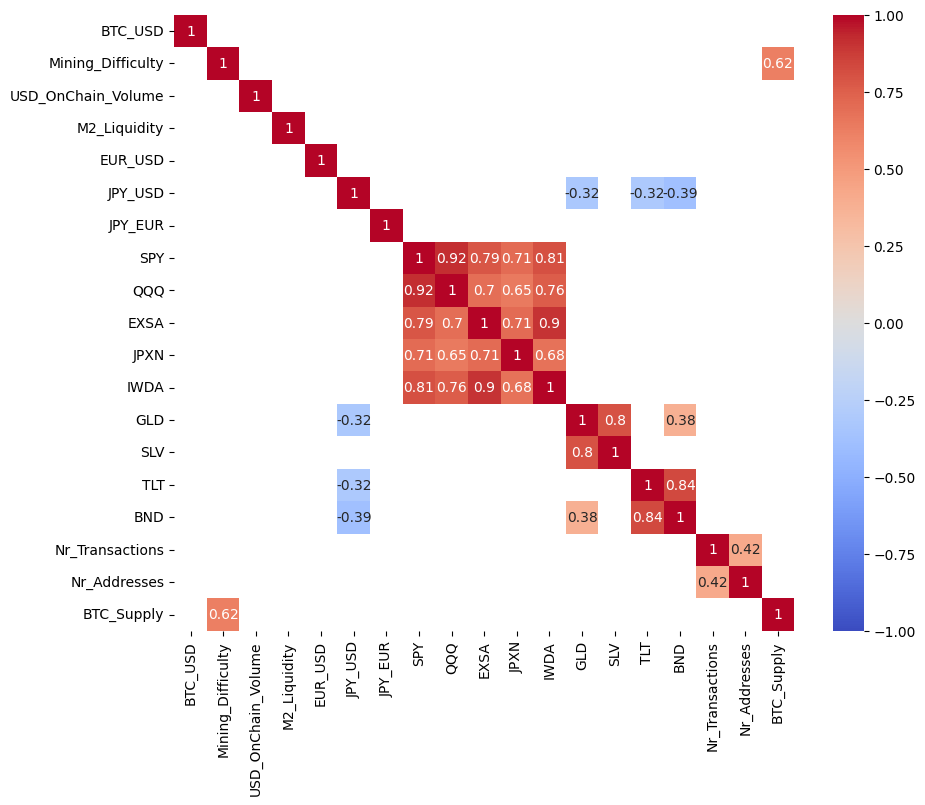

In [85]:
main.correlation_map(df=log_df, threshold=0.3)

In [86]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726 entries, 2010-09-17 to 2024-08-09
Freq: W-FRI
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BTC_USD             726 non-null    float64
 1   Mining_Difficulty   726 non-null    float64
 2   USD_OnChain_Volume  726 non-null    float64
 3   M2_Liquidity        726 non-null    float64
 4   EUR_USD             726 non-null    float64
 5   JPY_USD             726 non-null    float64
 6   JPY_EUR             726 non-null    float64
 7   SPY                 726 non-null    float64
 8   QQQ                 726 non-null    float64
 9   EXSA                726 non-null    float64
 10  JPXN                726 non-null    float64
 11  IWDA                726 non-null    float64
 12  GLD                 726 non-null    float64
 13  SLV                 726 non-null    float64
 14  TLT                 726 non-null    float64
 15  BND                 726 no

In [87]:
log_df.isna().sum()

BTC_USD               0
Mining_Difficulty     0
USD_OnChain_Volume    0
M2_Liquidity          0
EUR_USD               0
JPY_USD               0
JPY_EUR               0
SPY                   0
QQQ                   0
EXSA                  0
JPXN                  0
IWDA                  0
GLD                   0
SLV                   0
TLT                   0
BND                   0
Nr_Transactions       0
Nr_Addresses          0
BTC_Supply            0
dtype: int64

### Winsorozation

In [88]:
from scipy.stats.mstats import winsorize

winsorized_df = log_df.copy()

winsorized_df = winsorized_df.apply(lambda col: winsorize(col, (0.01, 0.01)))
winsorized_df.head()

BTC_USD  Mining_Difficulty  USD_OnChain_Volume  M2_Liquidity  \
Date                                                                       
2010-09-17   -0.690              3.490               3.621         3.941   
2010-09-24   -0.690              3.490               3.609         3.941   
2010-10-01   -0.690              3.490               3.609         3.941   
2010-10-08   -0.690              3.490               3.914         3.941   
2010-10-15   -0.690              3.490               3.638         3.941   

            EUR_USD  JPY_USD  JPY_EUR   SPY   QQQ  EXSA  JPXN  IWDA   GLD  \
Date                                                                        
2010-09-17    0.116   -1.934   -2.051 1.960 1.663 1.274 1.517 1.296 2.095   
2010-09-24    0.124   -1.927   -2.052 1.960 1.663 1.276 1.524 1.291 2.103   
2010-10-01    0.134   -1.922   -2.057 1.960 1.663 1.268 1.524 1.282 2.110   
2010-10-08    0.144   -1.916   -2.060 1.960 1.663 1.274 1.538 1.287 2.119   
2010-10-15    0.148   -1.911   -2.059 1.960 1.663 1.279 1.536 1.289 2.126   

             SLV   TLT   BND  Nr_Transactions  Nr_Addresses  BTC_Supply  
Date                                                                     
2010-09-17 1.307 1.846 1.745            2.665         2.700       6.653  
2010-09-24 1.322 1.854 1.746            2.700         2.757       6.653  
2010-10-01 1.335 1.860 1.748            2.766         2.827       6.653  
2010-10-08 1.357 1.858 1.750            2.665         2.700       6.653  
2010-10-15 1.376 1.841 1.748            2.665         2.700       6.653

In [89]:
winsorized_df.shape

(726, 19)

In [90]:
dependent_variable = "BTC_USD"

check_linearity(winsorized_df, dependent_variable)

### Lagged variables

In [91]:
# Add 1 and 2 Lagged Variable

lagged_df = winsorized_df.copy()

for column in lagged_df.columns:
    lagged_df[f'L1.{column}'] = lagged_df[column].shift(1)
    lagged_df[f'L2.{column}'] = lagged_df[column].shift(2)

In [92]:
lagged_df = lagged_df.iloc[2:]
lagged_df

BTC_USD  Mining_Difficulty  USD_OnChain_Volume  M2_Liquidity  \
Date                                                                       
2010-10-01   -0.690              3.490               3.609         3.941   
2010-10-08   -0.690              3.490               3.914         3.941   
2010-10-15   -0.690              3.490               3.638         3.941   
2010-10-22   -0.690              3.490               3.609         3.941   
2010-10-29   -0.690              3.490               4.007         3.941   
...             ...                ...                 ...           ...   
2024-07-12    4.763             13.900               9.867         4.321   
2024-07-19    4.824             13.914               9.931         4.321   
2024-07-26    4.829             13.914               9.865         4.321   
2024-08-02    4.788             13.926               9.992         4.321   
2024-08-09    4.774             13.926               9.815         4.321   

            EUR_USD  JPY_USD  JPY_EUR   SPY   QQQ  EXSA  ...  L1.TLT  L2.TLT  \
Date                                                     ...                   
2010-10-01    0.134   -1.922   -2.057 1.960 1.663 1.268  ...   1.854   1.846   
2010-10-08    0.144   -1.916   -2.060 1.960 1.663 1.274  ...   1.860   1.854   
2010-10-15    0.148   -1.911   -2.059 1.960 1.663 1.279  ...   1.858   1.860   
2010-10-22    0.144   -1.910   -2.054 1.962 1.663 1.283  ...   1.841   1.858   
2010-10-29    0.139   -1.912   -2.051 1.963 1.663 1.279  ...   1.846   1.841   
...             ...      ...      ...   ...   ...   ...  ...     ...     ...   
2024-07-12    0.036   -2.196   -2.230 2.736 2.673 1.712  ...   1.965   1.960   
2024-07-19    0.037   -2.196   -2.230 2.736 2.673 1.705  ...   1.971   1.965   
2024-07-26    0.035   -2.187   -2.222 2.736 2.666 1.708  ...   1.967   1.971   
2024-08-02    0.034   -2.184   -2.218 2.736 2.673 1.712  ...   1.967   1.967   
2024-08-09    0.034   -2.184   -2.218 2.736 2.673 1.712  ...   1.975   1.967   

            L1.BND  L2.BND  L1.Nr_Transactions  L2.Nr_Transactions  \
Date                                                                 
2010-10-01   1.746   1.745               2.700               2.665   
2010-10-08   1.748   1.746               2.766               2.700   
2010-10-15   1.750   1.748               2.665               2.766   
2010-10-22   1.748   1.750               2.665               2.665   
2010-10-29   1.749   1.748               2.780               2.665   
...            ...     ...                 ...                 ...   
2024-07-12   1.858   1.855               5.691               5.774   
2024-07-19   1.862   1.858               5.795               5.691   
2024-07-26   1.860   1.862               5.706               5.795   
2024-08-02   1.862   1.860               5.662               5.706   
2024-08-09   1.865   1.862               5.613               5.662   

            L1.Nr_Addresses  L2.Nr_Addresses  L1.BTC_Supply  L2.BTC_Supply  
Date                                                                        
2010-10-01            2.757            2.700          6.653          6.653  
2010-10-08            2.827            2.757          6.653          6.653  
2010-10-15            2.700            2.827          6.653          6.653  
2010-10-22            2.700            2.700          6.653          6.653  
2010-10-29            2.883            2.700          6.653          6.653  
...                     ...              ...            ...            ...  
2024-07-12            5.708            5.750          7.295          7.295  
2024-07-19            5.687            5.708          7.295          7.295  
2024-07-26            5.708            5.687          7.295          7.295  
2024-08-02            5.724            5.708          7.295          7.295  
2024-08-09            5.725            5.724          7.295          7.295  

[724 rows x 57 columns]

In [102]:
test_linearity_df = lagged_df.copy()
test_linearity_df = test_linearity_df.iloc[:, 19:]
test_linearity_df["BTC_USD"] = lagged_df["BTC_USD"]

#check_linearity(test_linearity_df, dependent_variable)

In [103]:
test_linearity_df

L1.BTC_USD  L2.BTC_USD  L1.Mining_Difficulty  \
Date                                                       
2010-10-01      -0.690      -0.690                 3.490   
2010-10-08      -0.690      -0.690                 3.490   
2010-10-15      -0.690      -0.690                 3.490   
2010-10-22      -0.690      -0.690                 3.490   
2010-10-29      -0.690      -0.690                 3.490   
...                ...         ...                   ...   
2024-07-12       4.753       4.780                13.904   
2024-07-19       4.763       4.753                13.900   
2024-07-26       4.824       4.763                13.914   
2024-08-02       4.829       4.824                13.914   
2024-08-09       4.788       4.829                13.926   

            L2.Mining_Difficulty  L1.USD_OnChain_Volume  \
Date                                                      
2010-10-01                 3.490                  3.609   
2010-10-08                 3.490                  3.609   
2010-10-15                 3.490                  3.914   
2010-10-22                 3.490                  3.638   
2010-10-29                 3.490                  3.609   
...                          ...                    ...   
2024-07-12                13.923                 10.060   
2024-07-19                13.904                  9.867   
2024-07-26                13.900                  9.931   
2024-08-02                13.914                  9.865   
2024-08-09                13.914                  9.992   

            L2.USD_OnChain_Volume  L1.M2_Liquidity  L2.M2_Liquidity  \
Date                                                                  
2010-10-01                  3.621            3.941            3.941   
2010-10-08                  3.609            3.941            3.941   
2010-10-15                  3.609            3.941            3.941   
2010-10-22                  3.914            3.941            3.941   
2010-10-29                  3.638            3.941            3.941   
...                           ...              ...              ...   
2024-07-12                  9.922            4.321            4.320   
2024-07-19                 10.060            4.321            4.321   
2024-07-26                  9.867            4.321            4.321   
2024-08-02                  9.931            4.321            4.321   
2024-08-09                  9.865            4.321            4.321   

            L1.EUR_USD  L2.EUR_USD  ...  L2.TLT  L1.BND  L2.BND  \
Date                                ...                           
2010-10-01       0.124       0.116  ...   1.846   1.746   1.745   
2010-10-08       0.134       0.124  ...   1.854   1.748   1.746   
2010-10-15       0.144       0.134  ...   1.860   1.750   1.748   
2010-10-22       0.148       0.144  ...   1.858   1.748   1.750   
2010-10-29       0.144       0.148  ...   1.841   1.749   1.748   
...                ...         ...  ...     ...     ...     ...   
2024-07-12       0.033       0.030  ...   1.960   1.858   1.855   
2024-07-19       0.036       0.033  ...   1.965   1.862   1.858   
2024-07-26       0.037       0.036  ...   1.971   1.860   1.862   
2024-08-02       0.035       0.037  ...   1.967   1.862   1.860   
2024-08-09       0.034       0.035  ...   1.967   1.865   1.862   

            L1.Nr_Transactions  L2.Nr_Transactions  L1.Nr_Addresses  \
Date                                                                  
2010-10-01               2.700               2.665            2.757   
2010-10-08               2.766               2.700            2.827   
2010-10-15               2.665               2.766            2.700   
2010-10-22               2.665               2.665            2.700   
2010-10-29               2.780               2.665            2.883   
...                        ...                 ...              ...   
2024-07-12               5.691               5.774            5.708   
2024-07-19               5.7

In [105]:
#check_linearity(test_linearity_df, dependent_variable)

# Split cycle Dfs

In [106]:
## ciclos
halving12 = "2012-11-28"
halving16 = "2016-07-09"
halving20 = "2020-05-11"
halving24 = "2024-04-19"

prep_df=lagged_df.copy()

ciclo1 = prep_df.loc[:halving12]
ciclo2 = prep_df.loc[halving12:halving16]
ciclo3 = prep_df.loc[halving16:halving20]
ciclo4 = prep_df.loc[halving20:halving24]
ciclo5 = prep_df.loc[halving24:]

In [107]:
for i in range(1, 6):  # Loop from 1 to 5 to match your DataFrame names
    df = globals()[f'ciclo{i}']  # Access each DataFrame using its name
    df.to_csv(f"ciclo{i}_df.csv", date_format='%Y-%m-%d')  # Save each DataFrame with a dynamic filename